In [17]:
import xarray
import zarr
import s3fs

In [18]:
s3_path = 's3://test/zarr_example'
# Initilize the S3 file system
s3 = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "http://localhost:9000"},key="test", secret="testtesttest1")
store = s3fs.S3Map(root=s3_path, s3=s3, check=False)
ds = xarray.open_zarr(store=store)

In [19]:
ds

<xarray.Dataset>
Dimensions:                               (height0: 1, height1: 1, height3: 1, height_above_msl: 1, p0: 1, time: 67, x: 719, y: 929)
Coordinates:
  * height0                               (height0) float32 0.0
  * height1                               (height1) float32 2.0
  * height3                               (height3) float32 10.0
  * height_above_msl                      (height_above_msl) float32 0.0
    latitude                              (y, x) float64 ...
    longitude                             (y, x) float64 ...
  * p0                                    (p0) float32 1013.25
  * time                                  (time) datetime64[ns] 2020-11-10T09...
  * x                                     (x) float32 303603.16 ... 2098603.2
  * y                                     (y) float32 -872931.56 ... 1447068.4
Data variables:
    air_pressure_at_sea_level             (time, height_above_msl, y, x) float32 ...
    air_temperature_2m                    (time, height1, y, x) float32 ...
    altitude                              (y, x) float32 ...
    cloud_area_fraction                   (time, y, x) float32 ...
    fog_area_fraction                     (time, height0, y, x) float32 ...
    helicopter_triggered_index            (time, y, x) float32 ...
    high_type_cloud_area_fraction         (time, y, x) float32 ...
    land_area_fraction                    (y, x) float32 ...
    low_type_cloud_area_fraction          (time, y, x) float32 ...
    medium_type_cloud_area_fraction       (time, y, x) float32 ...
    number_of_tracks                      (time, y, x) float32 ...
    precipitation_amount                  (time, y, x) float32 ...
    precipitation_amount_acc              (time, height0, y, x) float32 ...
    precipitation_amount_high_estimate    (time, y, x) float32 ...
    precipitation_amount_low_estimate     (time, y, x) float32 ...
    precipitation_amount_middle_estimate  (time, y, x) float32 ...
    precipitation_amount_prob_low         (time, y, x) float32 ...
    relative_humidity_2m                  (time, height1, y, x) float32 ...
    strike_probability                    (time, y, x) float32 ...
    surface_air_pressure                  (time, height0, y, x) float32 ...
    wind_speed_of_gust                    (time, height3, y, x) float32 ...
    x_wind_10m                            (time, height3, y, x) float32 ...
    y_wind_10m                            (time, height3, y, x) float32 ...
Attributes:
    Conventions:         CF-1.6
    comment:             none
    creator_url:         met.no
    geospatial_lat_max:  88.0
    geospatial_lat_min:  62.0
    geospatial_lon_max:  80.0
    geospatial_lon_min:  -18.0
    history:             2020-11-10 creation by fimex
    institution:         Norwegian Meteorological Institute, MET Norway
    license:             https://www.met.no/frie-meteorologiske-data/lisensie...
    max_time:            2020-11-13
    min_time:            2020-11-10 09:00:00Z
    references:          unknown
    source:              arome_arctic
    summary:             AROME_Arctic is a convection-permitting atmosphere m...
    title:               AROME_Arctic 2.5km

In [20]:
p = ds["air_temperature_2m"]

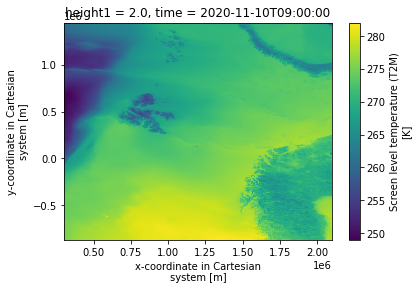

In [21]:
p[0].plot()